# Happy or Sad

In this mini project I am using a small dataset that contains emojis that show happy or sad emotions. It contains 80 images, 40 happy and 40 sad. 

## Objective

Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999

## Dataset Download

In [7]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

--2021-02-26 21:05:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2021-02-26 21:05:33 (202 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



## Peaking inside the dataset

Accessing sub directories from the parent directory to access happy and sad images. Then creating a a 4x4 grid with the first 8 images for happy emotion and next 8 represing the sad emotion.

In [12]:
# Directory with our happy pictures
happy_dir = os.path.join('/tmp/h-or-s/happy')
train_happy = os.listdir(happy_dir)

# Directory with our sad pictures
sad_dir = os.path.join('/tmp/h-or-s/sad')
train_sad = os.listdir(sad_dir)

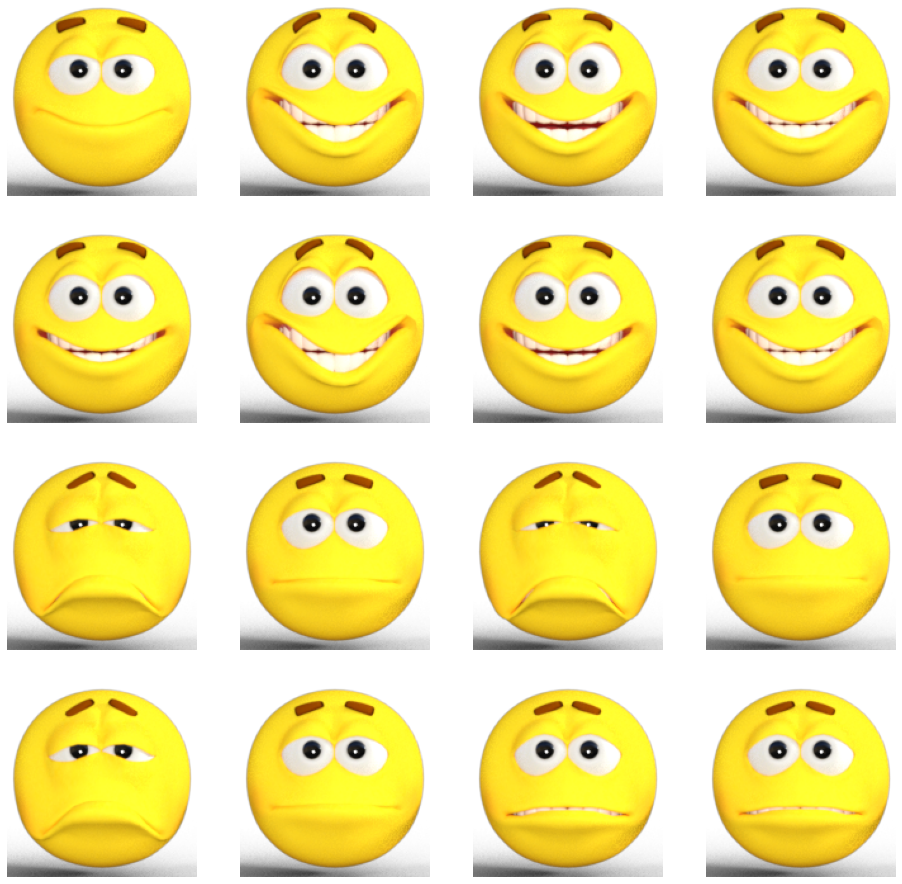

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(happy_dir, fname) 
                for fname in train_happy[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(sad_dir, fname) 
                for fname in train_sad[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Callbacks function


In [8]:
DESIRED_ACCURACY = 0.999

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>DESIRED_ACCURACY):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

## Building CNN

We are using three convolution layers and the image size as 150 X 150. Since, we have 80 images we will be setting batch_size as 10 and steps_per_epoch as 8 to make it 80.


In [9]:
callbacks = myCallback()

model = tf.keras.models.Sequential([

# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten Layer 
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling Model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
          optimizer=RMSprop(lr=0.001),
          metrics=['acc'])

# Setting up Image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s',  # This is the source directory for training images.
    target_size=(150, 150),  # All images will be resized to 150x150.
    batch_size=10, # Since we have 80 images we will read in 10 images at a time.
    class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels.

# Model Fitting
history = model.fit(
    train_generator, 
    steps_per_epoch = 8,  
    epochs = 15,
    verbose = 1,
    callbacks=[callbacks]
)

Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 3s 272ms/step - loss: 3.0759 - acc: 0.4771
Epoch 2/15
8/8 [==============================] - 2s 271ms/step - loss: 0.7245 - acc: 0.6903
Epoch 3/15
8/8 [==============================] - 2s 272ms/step - loss: 0.3439 - acc: 0.8877
Epoch 4/15
8/8 [==============================] - 2s 271ms/step - loss: 0.2108 - acc: 0.9362
Epoch 5/15
8/8 [==============================] - 2s 272ms/step - loss: 0.1745 - acc: 0.8841
Epoch 6/15
8/8 [==============================] - 2s 274ms/step - loss: 0.1066 - acc: 0.9528
Epoch 7/15
8/8 [==============================] - 2s 273ms/step - loss: 0.0516 - acc: 0.9726
Epoch 8/15
8/8 [==============================] - 2s 271ms/step - loss: 0.1944 - acc: 0.8246
Epoch 9/15
8/8 [==============================] - 2s 270ms/step - loss: 0.0180 - acc: 1.0000

Reached 99.9% accuracy so cancelling training!


The model is overfitted and is not accurate. However, the objective of this exercise is met. To counter overfitting we must increase the size of dataset at the very least.